### ICON Fix Date Glitch on Jan 19th 

In [2]:
import xarray as xr
import numpy as np

ds_3d_jan18 = xr.open_dataset('/oak/stanford/groups/aditis2/robcking/icon_coarse/base/N128/coarse_N128_atm_3d_6h_PL_20230118T000000Z.nc')
ds_3d_jan20 = xr.open_dataset('/oak/stanford/groups/aditis2/robcking/icon_coarse/base/N128/coarse_N128_atm_3d_6h_PL_20230120T000000Z.nc')
ds_3d_jan19 = xr.open_dataset('/oak/stanford/groups/aditis2/robcking/icon_coarse/base/N128/coarse_N128_atm_3d_6h_PL_20230119T000000Z.nc')

FileNotFoundError: [Errno 2] No such file or directory: '/oak/stanford/groups/aditis2/robcking/icon_coarse/base/N128/coarse_N128_atm_3d_6h_PL_20230119T000000Z.nc'

In [2]:
ds_3d_jan19.time

<xarray.DataArray 'time' (time: 7)> Size: 56B
array(['2023-01-19T00:00:00.000000000', '2023-01-19T06:00:00.000000000',
       '2023-01-19T12:00:00.000000000', '2023-01-19T18:00:00.000000000',
       '2023-01-19T06:00:00.000000000', '2023-01-19T12:00:00.000000000',
       '2023-01-19T18:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 56B 2023-01-19 ... 2023-01-19T18:00:00
Attributes:
    standard_name:  time
    axis:           T

In [3]:
u_cur = ds_3d_jan19.u.isel(plev=-1).values
u_past = ds_3d_jan18.u.isel(plev=-1).values
u_future = ds_3d_jan20.u.isel(plev=-1).values
lat = ds_3d_jan19.lat 
lon = ds_3d_jan19.lon 

u = np.concatenate([u_past,u_cur,u_future])

Lon,Lat = np.meshgrid(lon,lat)

MovieWriter ffmpeg unavailable; using Pillow instead.


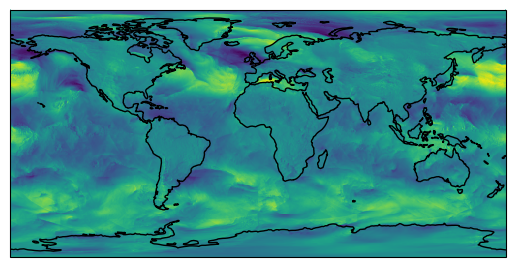

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs

fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()})

mesh = ax.pcolormesh(Lon,Lat,u[0],transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")

def step(i):
    mesh.set_array(u[i].ravel())
    return mesh, 

anim = FuncAnimation(fig,step,frames=u.shape[0],interval=2000)
anim.save('icon_fix/icon_base_jan19th_srfc_u.gif')

First fix, use old up until first data point of jan 19th, discard the rest 

In [5]:
u_fix_1 = np.concatenate([u_past,u_cur[[0,4,5,6]],u_future])
u_fix_2 = np.concatenate([u_past,u_cur[[0,1,2,3]],u_future])

MovieWriter ffmpeg unavailable; using Pillow instead.


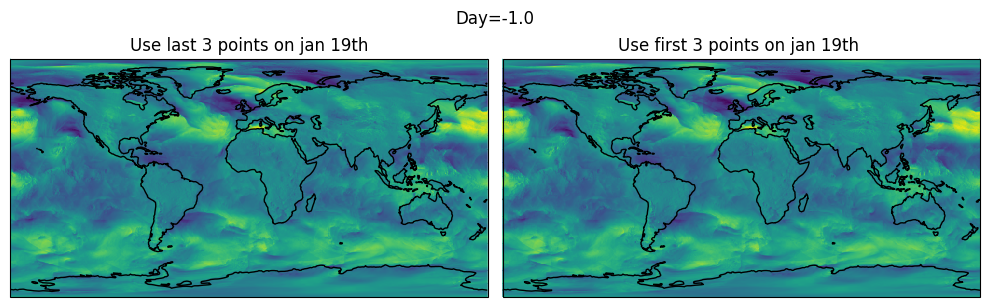

In [8]:
fig,(ax_fix1,ax_fix2) = plt.subplots(figsize=(10,3.5),ncols=2,nrows=1,subplot_kw={'projection':ccrs.PlateCarree()})
fig.tight_layout()
mesh1 = ax_fix1.pcolormesh(Lon,Lat,u_fix_1[0],transform=ccrs.PlateCarree())
mesh2 = ax_fix2.pcolormesh(Lon,Lat,u_fix_2[0],transform=ccrs.PlateCarree())
ax_fix1.coastlines()
ax_fix1.set_xlabel("Latitude")
ax_fix1.set_ylabel("Longitude")
ax_fix2.coastlines()
ax_fix2.set_xlabel("Latitude")
ax_fix2.set_ylabel("Longitude")
ax_fix1.set_title("Use last 3 points on jan 19th")
ax_fix2.set_title("Use first 3 points on jan 19th ")

def step(i):
    mesh1.set_array(u_fix_1[i].ravel())
    mesh2.set_array(u_fix_2[i].ravel())
    fig.suptitle(f"Day={(i-4)/4}")
    return mesh1,mesh2 

anim = FuncAnimation(fig,step,frames=u_fix_1.shape[0],interval=2000)
anim.save('icon_fix/icon_fixes.gif')